<a href="https://colab.research.google.com/github/davidclizbe/datascience/blob/master/Clizbe_Unsupervised_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Relevant Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap

In [ ]:
url = 'https://github.com/davidclizbe/datascience/raw/master/datascienceUnsuperivsed/GP1_0.6_marker.csv'
mocap1_df = pd.read_csv(url)
mocap1_df

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,L_FM2_y,L_FM5_y,R_FCC_y,R_FM1_y,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,0.635224,0.681603,0.466974,0.487775,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,0.634272,0.680777,0.466954,0.487758,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,0.633242,0.679868,0.466931,0.487738,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,0.632139,0.678875,0.466905,0.487715,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,0.630968,0.677799,0.466875,0.487688,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1.131665,1.334620,1.336033,1.312159,0.936247,1.150734,1.148909,1.122463,0.566691,0.562259,0.611228,0.658170,0.465135,0.477596,0.437999,0.387250,0.108844,0.074029,0.081974,0.055194,0.077946,0.061481,0.066226,0.049504
11996,1.136466,1.339685,1.341100,1.317486,0.934519,1.148988,1.147176,1.120718,0.566975,0.562450,0.611392,0.658445,0.465163,0.477599,0.437994,0.387244,0.107277,0.073884,0.082005,0.055195,0.077944,0.061450,0.066203,0.049494
11997,1.140658,1.344090,1.345509,1.322117,0.933004,1.147460,1.145657,1.119190,0.567223,0.562607,0.611524,0.658675,0.465187,0.477602,0.437990,0.387239,0.105965,0.073780,0.082054,0.055222,0.077943,0.061423,0.066183,0.049484
11998,1.144306,1.347908,1.349332,1.326128,0.931680,1.146127,1.144330,1.117854,0.567440,0.562735,0.611628,0.658864,0.465209,0.477603,0.437986,0.387234,0.104873,0.073708,0.082116,0.055269,0.077942,0.061400,0.066166,0.049476


In [ ]:
mocap1_df.shape

(12000, 24)

In [ ]:
mocap1_df['test'] = mocap1_df.index * 5
mocap1_df

,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,L_FM2_y,L_FM5_y,R_FCC_y,R_FM1_y,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z,test
0,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,0.635224,0.681603,0.466974,0.487775,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901,0
1,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,0.634272,0.680777,0.466954,0.487758,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842,5
2,1.136807,1.342521,1.339171,1.316510,0.799617,1.012833,1.012659,0.987012,0.575228,0.585174,0.633242,0.679868,0.466931,0.487738,0.448206,0.396145,0.089767,0.088228,0.099043,0.070312,0.082279,0.058166,0.063040,0.048781,10
3,1.141961,1.347770,1.344579,1.322506,0.797009,1.010229,1.010033,0.984370,0.575094,0.584023,0.632139,0.678875,0.466905,0.487715,0.448160,0.396093,0.089354,0.090171,0.100820,0.071672,0.082464,0.058132,0.063014,0.048717,15
4,1.147230,1.353103,1.350078,1.328615,0.794281,1.007500,1.007287,0.981602,0.574925,0.582801,0.630968,0.677799,0.466875,0.487688,0.448109,0.396038,0.088963,0.092198,0.102656,0.073079,0.082663,0.058101,0.062985,0.048651,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1.131665,1.334620,1.336033,1.312159,0.936247,1.150734,1.148909,1.122463,0.566691,0.562259,0.611228,0.658170,0.465135,0.477596,0.437999,0.387250,0.108844,0.074029,0.081974,0.055194,0.077946,0.061481,0.066226,0.049504,59975
11996,1.136466,1.339685,1.341100,1.317486,0.934519,1.148988,1.147176,1.120718,0.566975,0.562450,0.611392,0.658445,0.465163,0.477599,0.437994,0.387244,0.107277,0.073884,0.082005,0.055195,0.077944,0.061450,0.066203,0.049494,59980
11997,1.140658,1.344090,1.345509,1.322117,0.933004,1.147460,1.145657,1.119190,0.567223,0.562607,0.611524,0.658675,0.465187,0.477602,0.437990,0.387239,0.105965,0.073780,0.082054,0.055222,0.077943,0.061423,0.066183,0.049484,59985
11998,1.144306,1.347908,1.349332,1.326128,0.931680,1.146127,1.144330,1.117854,0.567440,0.562735,0.611628,0.658864,0.465209,0.477603,0.437986,0.387234,0.104873,0.073708,0.082116,0.055269,0.077942,0.061400,0.066166,0.049476,59990


Import Trial 1: Kinetics

In [ ]:
url = 'https://github.com/davidclizbe/datascience/raw/master/datascienceUnsuperivsed/GP1_0.6_force.csv'
force1_df = pd.read_csv(url, error_bad_lines=False)
force1_df

,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z
0,0.000000,-9.537293,0.000000,30.241894,0.000000,777.790222
1,0.000000,-8.993257,0.000000,30.251348,0.000000,777.832886
2,0.000000,-8.459884,0.000000,30.250864,0.000000,777.852966
3,0.000000,-7.937055,0.000000,30.241360,0.000000,777.852539
4,0.000000,-7.424666,0.000000,30.223719,0.000000,777.833374
...,...,...,...,...,...,...
59995,-0.092236,4.437865,0.316739,27.443682,3.645612,765.482605
59996,-0.198912,4.714253,0.336574,27.456888,3.541452,765.819153
59997,-0.314791,5.010076,0.358098,27.471334,3.428169,766.176636
59998,-0.440172,5.326686,0.381377,27.487047,3.305427,766.556824


In [ ]:
force1_df.shape

(60000, 6)

In [ ]:
full1_df = pd.merge(force1_df, mocap1_df, how= 'left', right_on= 'test', left_index= True).reset_index()
full1_df.head(10)

,index,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,L_FM2_y,L_FM5_y,R_FCC_y,R_FM1_y,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z,test
0,0.0,0.0,-9.537293,0.0,30.241894,0.0,777.790222,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,0.635224,0.681603,0.466974,0.487775,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901,0
1,NaN,0.0,-8.993257,0.0,30.251348,0.0,777.832886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,0.0,-8.459884,0.0,30.250864,0.0,777.852966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,NaN,0.0,-7.937055,0.0,30.241360,0.0,777.852539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,0.0,-7.424666,0.0,30.223719,0.0,777.833374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
5,1.0,0.0,-6.922601,0.0,30.198772,0.0,777.797241,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,0.634272,0.680777,0.466954,0.487758,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842,5
6,NaN,0.0,-6.430703,0.0,30.167316,0.0,777.746155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,NaN,0.0,-5.948761,0.0,30.130096,0.0,777.681580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
8,NaN,0.0,-5.476509,0.0,30.087822,0.0,777.605469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
9,NaN,0.0,-5.013649,0.0,30.041161,0.0,777.519104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9


In [ ]:
exp_df = full1_df.interpolate(method= 'linear', limit_direction= 'forward')
exp_df.head(20)

,index,FP1_x,FP2_x,FP1_y,FP2_y,FP1_z,FP2_z,L_FCC_x,L_FM1_x,L_FM2_x,L_FM5_x,R_FCC_x,R_FM1_x,R_FM2_x,R_FM5_x,L_FCC_y,L_FM1_y,L_FM2_y,L_FM5_y,R_FCC_y,R_FM1_y,R_FM2_y,R_FM5_y,L_FCC_z,L_FM1_z,L_FM2_z,L_FM5_z,R_FCC_z,R_FM1_z,R_FM2_z,R_FM5_z,test
0,0.0,0.0,-9.537293,0.0,30.241894,0.0,777.790222,1.127087,1.332534,1.328893,1.305142,0.804407,1.017605,1.017485,0.991847,0.575397,0.587244,0.635224,0.681603,0.466974,0.487775,0.448289,0.396237,0.090627,0.084655,0.095734,0.067779,0.081946,0.058241,0.063082,0.048901,0
1,0.2,0.0,-8.993257,0.0,30.251348,0.0,777.832886,1.128036,1.333511,1.329899,1.306254,0.803943,1.017143,1.017018,0.991379,0.575383,0.587045,0.635034,0.681438,0.466970,0.487772,0.448281,0.396228,0.090541,0.085001,0.096056,0.068025,0.081978,0.058233,0.063078,0.048889,1
2,0.4,0.0,-8.459884,0.0,30.250864,0.0,777.852966,1.128985,1.334489,1.330904,1.307365,0.803479,1.016681,1.016550,0.990912,0.575369,0.586846,0.634843,0.681273,0.466966,0.487768,0.448273,0.396219,0.090454,0.085347,0.096377,0.068271,0.082010,0.058226,0.063074,0.048877,2
3,0.6,0.0,-7.937055,0.0,30.241360,0.0,777.852539,1.129933,1.335466,1.331910,1.308477,0.803016,1.016220,1.016083,0.990444,0.575355,0.586647,0.634653,0.681107,0.466962,0.487765,0.448266,0.396211,0.090368,0.085692,0.096699,0.068518,0.082042,0.058218,0.063070,0.048866,3
4,0.8,0.0,-7.424666,0.0,30.223719,0.0,777.833374,1.130882,1.336444,1.332915,1.309588,0.802552,1.015758,1.015615,0.989977,0.575341,0.586448,0.634462,0.680942,0.466958,0.487761,0.448258,0.396202,0.090281,0.086038,0.097020,0.068764,0.082074,0.058211,0.063066,0.048854,4
5,1.0,0.0,-6.922601,0.0,30.198772,0.0,777.797241,1.131831,1.337421,1.333921,1.310700,0.802088,1.015296,1.015148,0.989509,0.575327,0.586249,0.634272,0.680777,0.466954,0.487758,0.448250,0.396193,0.090195,0.086384,0.097342,0.069010,0.082106,0.058203,0.063062,0.048842,5
6,1.2,0.0,-6.430703,0.0,30.167316,0.0,777.746155,1.132826,1.338441,1.334971,1.311862,0.801594,1.014803,1.014650,0.989010,0.575307,0.586034,0.634066,0.680595,0.466949,0.487754,0.448241,0.396183,0.090109,0.086753,0.097682,0.069270,0.082141,0.058196,0.063058,0.048830,6
7,1.4,0.0,-5.948761,0.0,30.130096,0.0,777.681580,1.133821,1.339461,1.336021,1.313024,0.801100,1.014311,1.014152,0.988510,0.575287,0.585819,0.633860,0.680413,0.466945,0.487750,0.448232,0.396174,0.090024,0.087122,0.098022,0.069531,0.082175,0.058188,0.063053,0.048818,7
8,1.6,0.0,-5.476509,0.0,30.087822,0.0,777.605469,1.134817,1.340481,1.337071,1.314186,0.800605,1.013818,1.013655,0.988011,0.575268,0.585604,0.633654,0.680232,0.466940,0.487746,0.448224,0.396164,0.089938,0.087490,0.098363,0.069791,0.082210,0.058181,0.063049,0.048805,8
9,1.8,0.0,-5.013649,0.0,30.041161,0.0,777.519104,1.135812,1.341501,1.338121,1.315348,0.800111,1.013326,1.013157,0.987511,0.575248,0.585389,0.633448,0.680050,0.466936,0.487742,0.448215,0.396155,0.089853,0.087859,0.098703,0.070052,0.082244,0.058173,0.063044,0.048793,9


First a marker from the foot in the Z direction. What one should see, if correct, is a series of quasiperiodic signals going up and down. 

Next we will plot in the same dimension direction a signal of the force plate. This should have a similar up and down motion across the time series. 

Dimension Reduction UMAP and PCA
both give just components that are just numbers 
kmeans - different assumptions
dbscan - different assumptions
hierarchical cluster - group of phases...doesnt make sense here unless more columns of data: propulsion vs braking, stance vs swing
clustering before vs after pca or umap
pca - linear relationships
umap - nonlinear relationships, can reduce down to two meaningful dimensions, colored along an x and y; are things moving in x, similar to tsne (both are dimensionality reduction methods and reduce it down and graph it and both tend to draw data points naturally into clustered arrangements. umap and tsne look in neighborhood and things in neighborhood remain as in lower dimensions. in dbscan it just looks at if theyre close vs far where umap is where it can push things far away. after you use these techiques they glob things together

In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

In [ ]:
n = 4
k_means = KMeans(n_clusters=n)
k_means.fit(exp_df)
y_pred = k_means.predict(exp_df)

In [ ]:
y_pred

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
y_pred.shape

(60000,)

In [ ]:
exp_df.columns

Index(['index', 'FP1_x', 'FP2_x', 'FP1_y', 'FP2_y', 'FP1_z', 'FP2_z',
       'L_FCC_x', 'L_FM1_x', 'L_FM2_x', 'L_FM5_x', 'R_FCC_x', 'R_FM1_x',
       'R_FM2_x', 'R_FM5_x', 'L_FCC_y', 'L_FM1_y', 'L_FM2_y', 'L_FM5_y',
       'R_FCC_y', 'R_FM1_y', 'R_FM2_y', 'R_FM5_y', 'L_FCC_z', 'L_FM1_z',
       'L_FM2_z', 'L_FM5_z', 'R_FCC_z', 'R_FM1_z', 'R_FM2_z', 'R_FM5_z',
       'test'],
      dtype='object')

For the X dimension on the motion capture

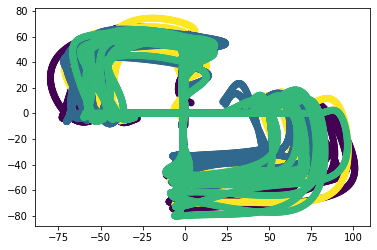

In [ ]:
plt.scatter(exp_df['FP1_x'], exp_df['FP2_x'], c= y_pred)
plt.show()

For the Y direction on the motion capture

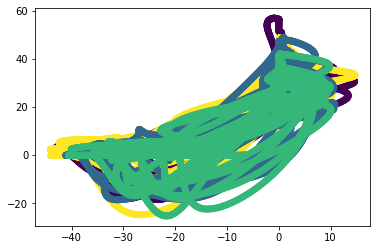

In [ ]:
plt.scatter(exp_df['FP1_y'], exp_df['FP2_y'], c= y_pred)
plt.show()

For the Z direction on the motion capture

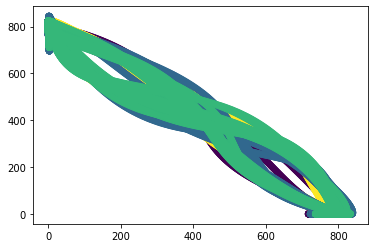

In [ ]:
plt.scatter(exp_df['FP1_z'], exp_df['FP2_z'], c= y_pred)
plt.show()

For the X direction on the force plate

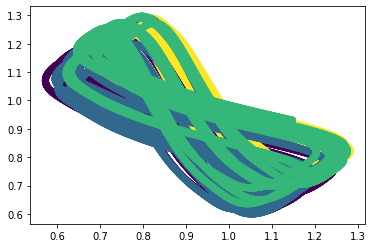

In [ ]:
plt.scatter(exp_df['L_FCC_x'], exp_df['R_FCC_x'], c= y_pred)
plt.show()

For the Y direction on the force plate

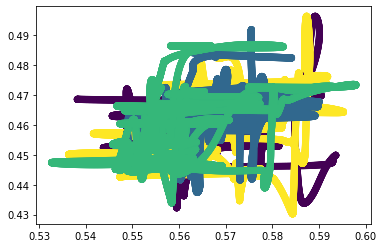

In [ ]:
plt.scatter(exp_df['L_FCC_y'], exp_df['R_FCC_y'], c= y_pred)
plt.show()

For the Z direction on the force plate.

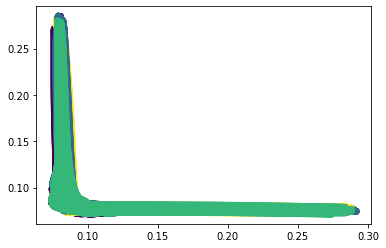

In [ ]:
plt.scatter(exp_df['L_FCC_z'], exp_df['R_FCC_z'], c= y_pred)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(exp_df)

In [ ]:
kmeans_cluster = KMeans(n_clusters=n)

kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

In [ ]:
pca = PCA(n_components=n).fit_transform(X_std)

In [ ]:
pca.shape

(60000, 4)

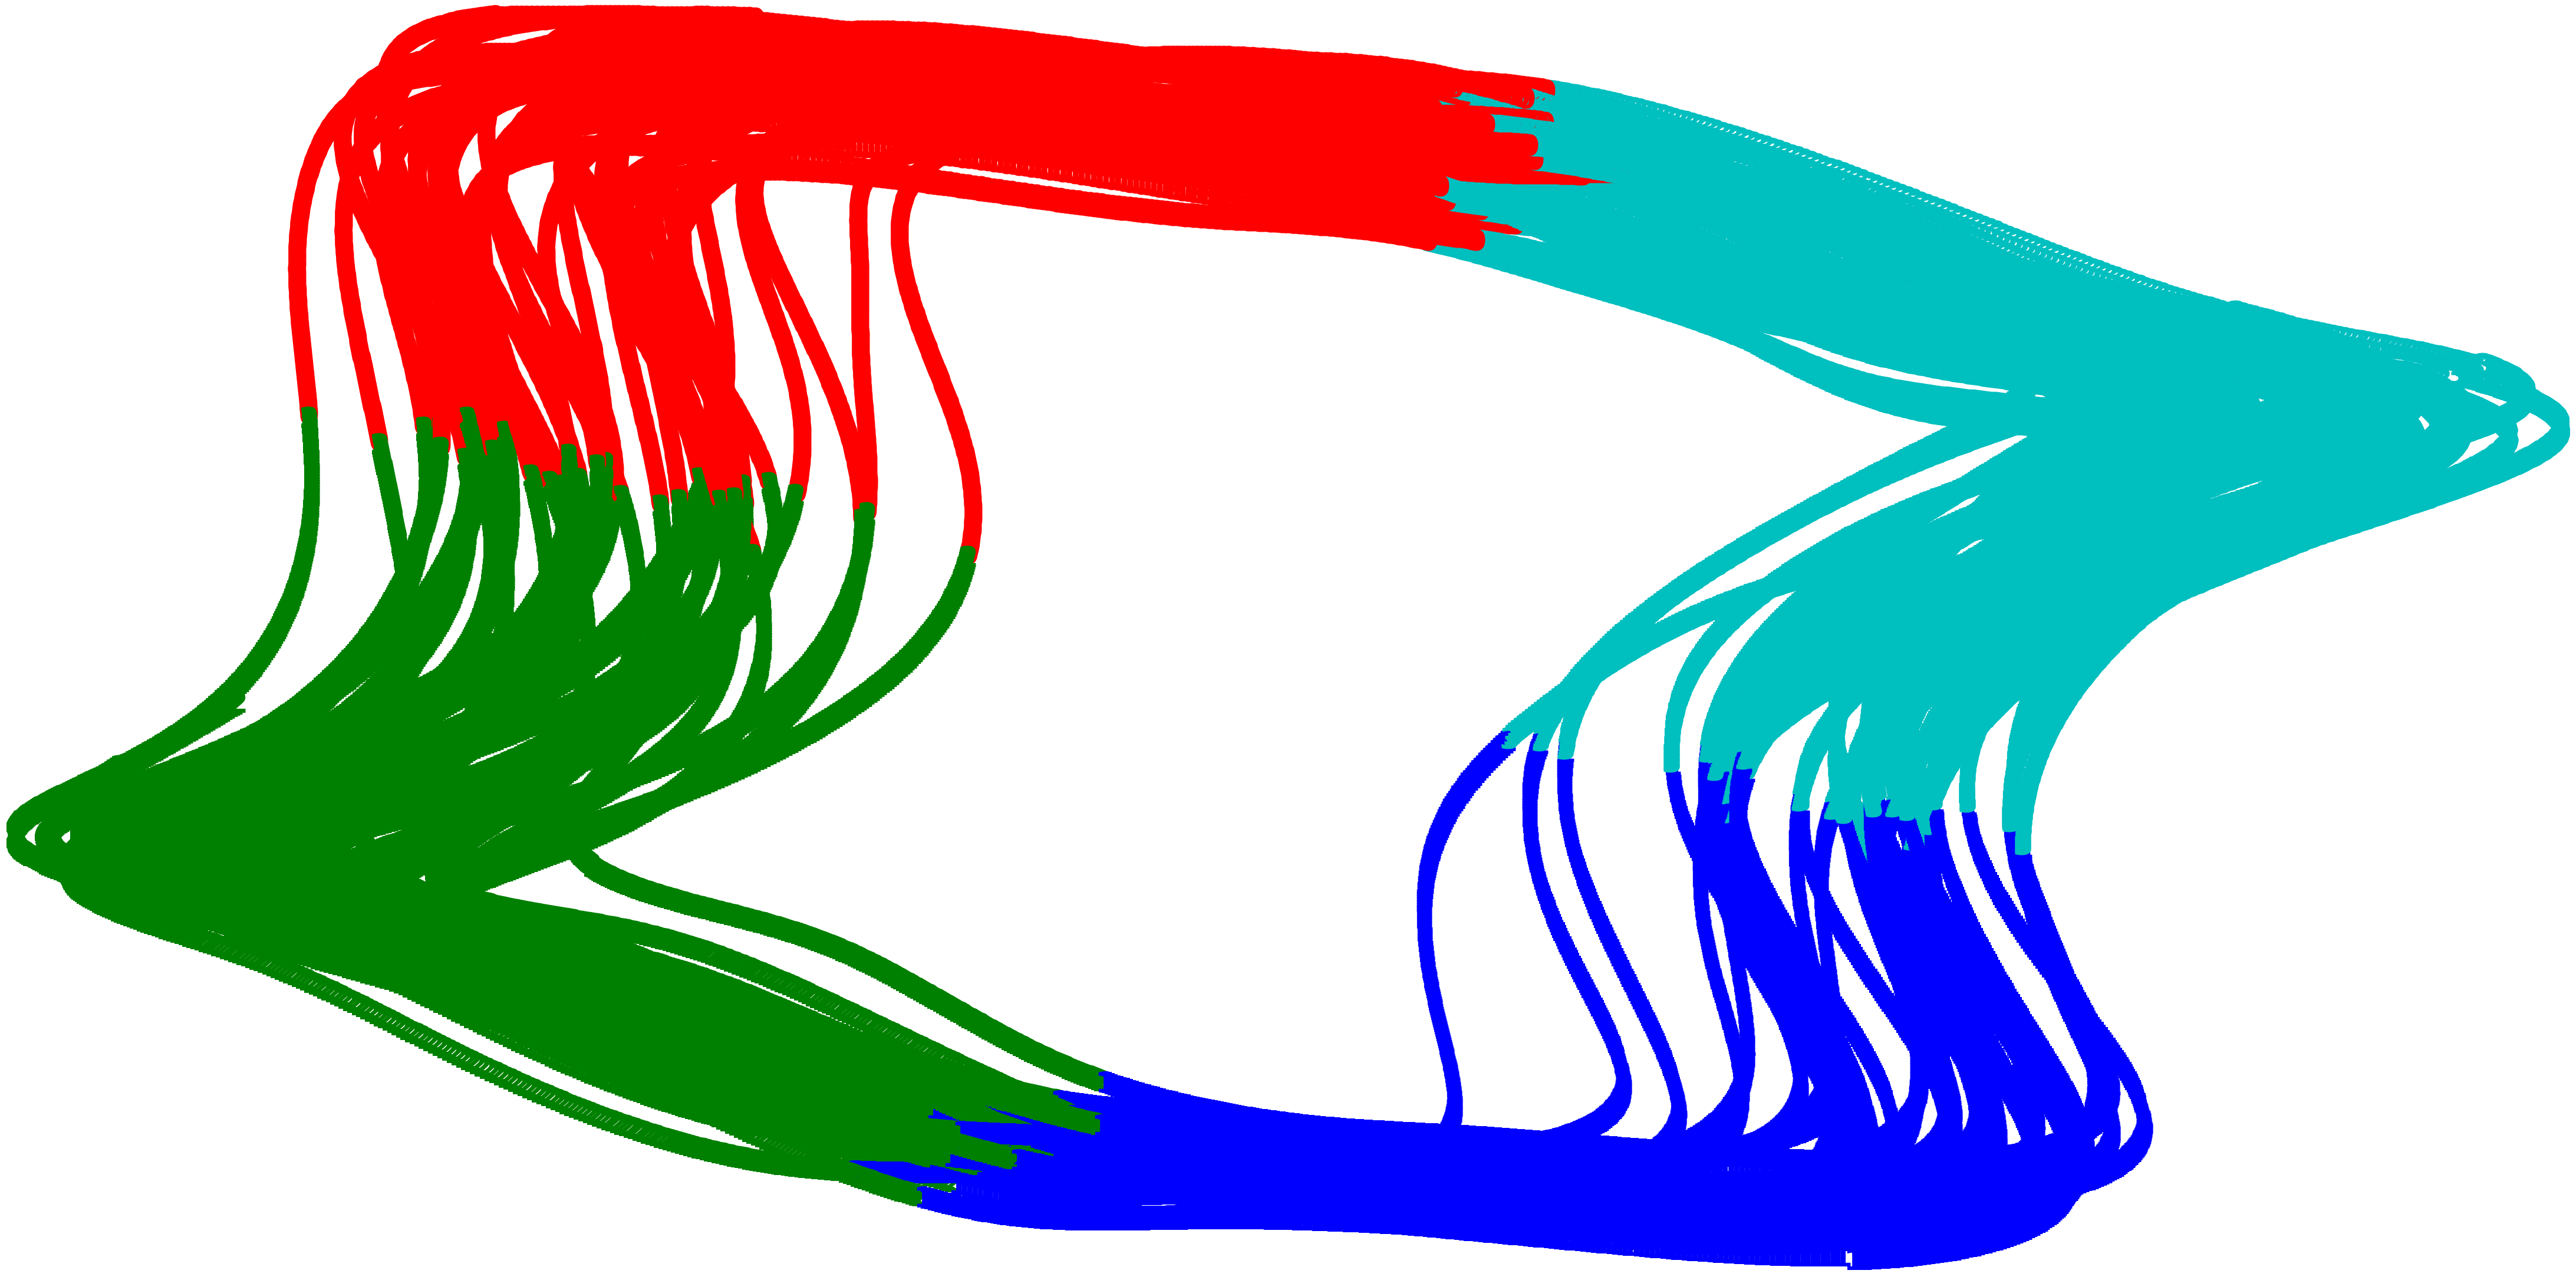

In [ ]:
pca = PCA(n_components=n).fit_transform(X_std)

plt.figure()
colours = 'rbgcky'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
umapplot = umap.UMAP(n_neighbors=8, metric='euclidean').fit(X_std)
umapplot

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=8, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

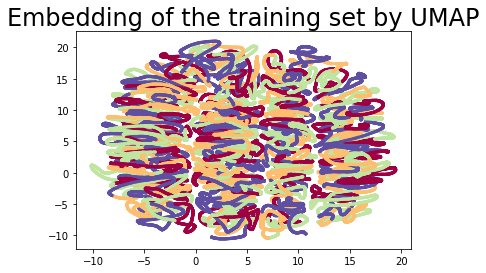

In [ ]:
plt.scatter(umapplot.embedding_[:, 0], umapplot.embedding_[:, 1], s= 5, c=y_pred, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:
umapplot = umap.UMAP(n_neighbors=4, metric='euclidean').fit(X_std)
umapplot

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=4, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

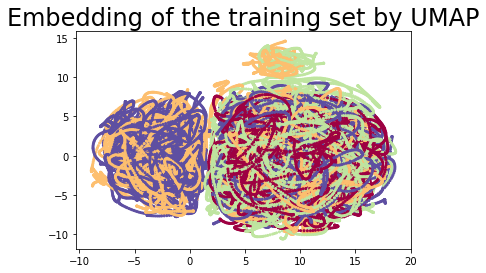

In [ ]:
plt.scatter(umapplot.embedding_[:, 0], umapplot.embedding_[:, 1], s= 4, c=y_pred, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:
umapplot = umap.UMAP(n_neighbors=3, metric='euclidean').fit(X_std)
umapplot

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=3, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

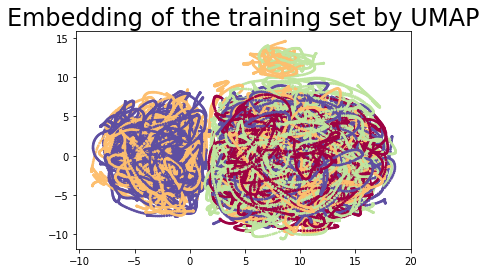

In [ ]:
plt.scatter(umapplot.embedding_[:, 0], umapplot.embedding_[:, 1], s= 3, c=y_pred, cmap='Spectral')
plt.title('Embedding of the training set by UMAP', fontsize=24);

In [ ]:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap

In [ ]:
X = exp_df
y = y_pred

print(X.shape, y.shape)

(60000, 32) (60000,)


In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.6/dist-packages/umap/rp_tree.py:778: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  "Random Projection forest initialisation failed due to recursion"


UMAP done! Time elapsed: 61.793636083602905 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.6/dist-packages/umap/rp_tree.py:778: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  "Random Projection forest initialisation failed due to recursion"


UMAP done! Time elapsed: 60.29067134857178 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=4,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.6/dist-packages/umap/rp_tree.py:778: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  "Random Projection forest initialisation failed due to recursion"


UMAP done! Time elapsed: 58.10126781463623 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=3,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.6/dist-packages/umap/rp_tree.py:778: UserWarning: Random Projection forest initialisation failed due to recursionlimit being reached. Something is a little strange with your data, and this may take longer than normal to compute.
  "Random Projection forest initialisation failed due to recursion"


UMAP done! Time elapsed: 82.43010401725769 seconds


In [ ]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [ ]:
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

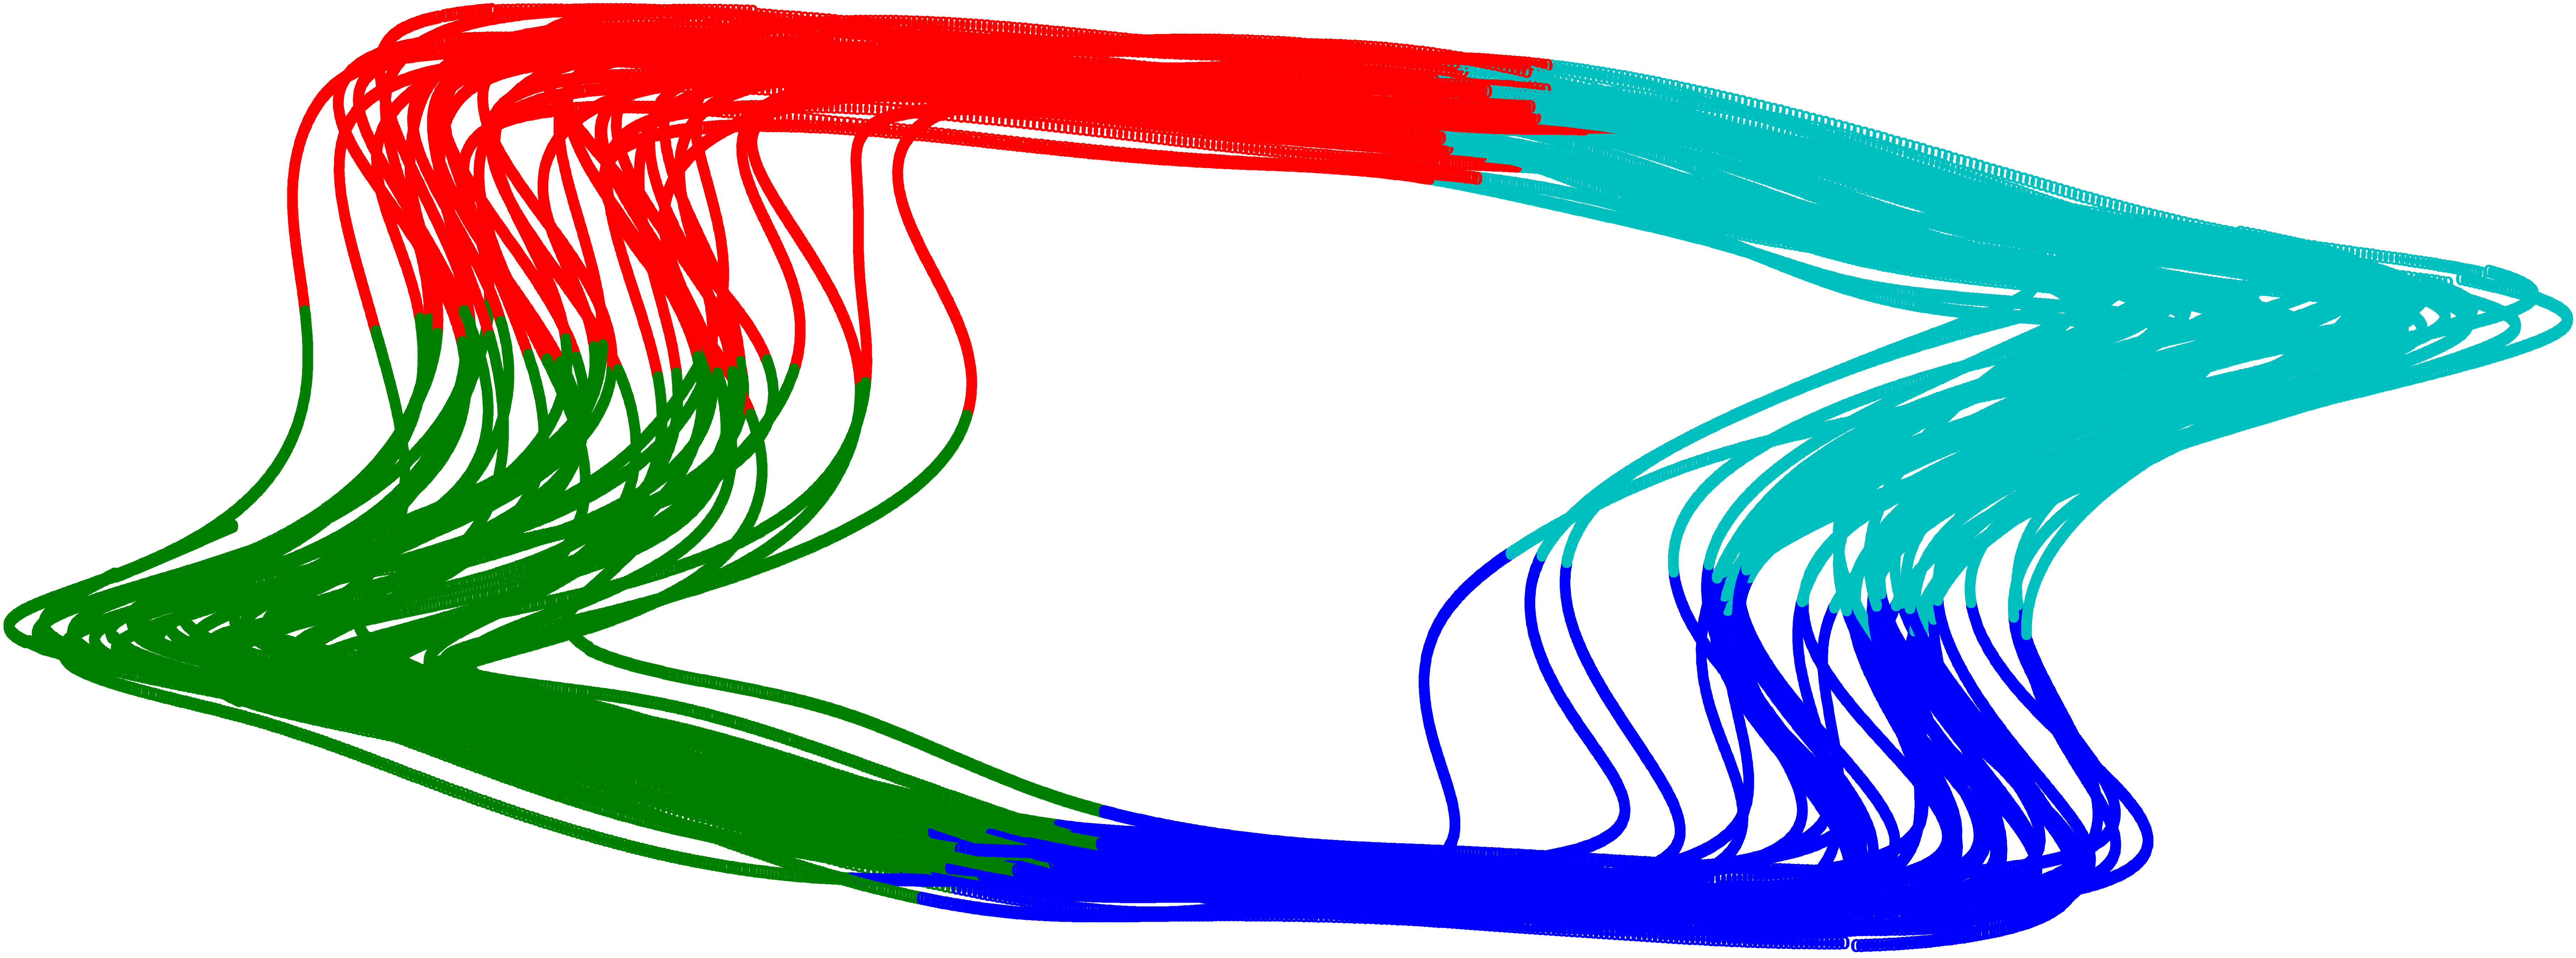

In [ ]:
pca = PCA(n_components=5).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgcky'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.0
